In [1]:
library('magrittr')
library('dplyr')
library('lubridate')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Attaching package: ‘lubridate’

The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘lubridate’

The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



Recuperamos el archivo de trabajo en .rds.

In [2]:
df = readRDS('../02_Variables/df.rds')

In [3]:
df %>% head()

# A tibble: 6 × 18
  date       state_id store_id dept_id cat_id item_id     wm_yr_wk d     ventas sell_price  year month  wday weekday   event_name_1
  <date>     <chr>    <chr>    <chr>   <chr>  <chr>          <int> <chr>  <int>      <dbl> <int> <int> <int> <chr>     <chr>       
1 2013-01-01 CA       CA_3     FOODS_3 FOODS  FOODS_3_090    11249 d_704      0       1.25  2013     1     4 Tuesday   NewYear     
2 2013-01-02 CA       CA_3     FOODS_3 FOODS  FOODS_3_090    11249 d_705    224       1.25  2013     1     5 Wednesday NA          
3 2013-01-03 CA       CA_3     FOODS_3 FOODS  FOODS_3_090    11249 d_706    241       1.25  2013     1     6 Thursday  NA          
4 2013-01-04 CA       CA_3     FOODS_3 FOODS  FOODS_3_090    11249 d_707    232       1.25  2013     1     7 Friday    NA          
5 2013-01-05 CA       CA_3     FOODS_3 FOODS  FOODS_3_090    11250 d_708    301       1.25  2013     1     1 Saturday  NA          
6 2013-01-06 CA       CA_3     FOODS_3 FOODS  FOODS_3_090

Visualizamos información y tipos de variables.

In [4]:
str(df)

tibble [21,900 × 18] (S3: tbl_df/tbl/data.frame)
 $ date        : Date[1:21900], format: tibble [21,900 × 18] (S3: tbl_df/tbl/data.frame)
 $ date        : Date[1:21900], format: 

"2013-01-01" "2013-01-02" "2013-01-03" "2013-01-04" ...
 $ state_id    : chr [1:21900] "CA" "CA" "CA" "CA" ...
 $ store_id    : chr [1:21900] "CA_3" "CA_3" "CA_3" "CA_3" ...
 $ dept_id     : chr [1:21900] "FOODS_3" "FOODS_3" "FOODS_3" "FOODS_3" ...
 $ cat_id      : chr [1:21900] "FOODS" "FOODS" "FOODS" "FOODS" ...
 $ item_id     : chr [1:21900] "FOODS_3_090" "FOODS_3_090" "FOODS_3_090" "FOODS_3_090" ...
 $ wm_yr_wk    : int [1:21900] 11249 11249 11249 11249 11250 11250 11250 11250 11250 11250 ...
 $ d           : chr [1:21900] "d_704" "d_705" "d_706" "d_707" ...
 $ ventas      : int [1:21900] 0 224 241 232 301 270 188 215 197 245 ...
 $ sell_price  : num [1:21900] 1.25 1.25 1.25 1.25 1.25 1.25 1.25 1.25 1.25 1.25 ...
 $ year        : int [1:21900] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month       : int [1:21900] 1 1 1 1 1 1 1 1 1 1 ...
 $ wday        : int [1:21900] 4 5 6 7 1 2 3 4 5 6 ...
 $ weekday     : chr [1:21900] "Tuesday" "Wednesday" "Thursday" "Friday" ...
 

Ponemos year, month y wday como variables de tipo chr.

In [5]:
df = df %>% mutate(across(c(year, month, wday), as.character))

Comprobamos:

In [6]:
str(df)

tibble [21,900 × 18] (S3: tbl_df/tbl/data.frame)
 $ date        : Date[1:21900], format: "2013-01-01" "2013-01-02" "2013-01-03" "2013-01-04" ...
 $ state_id    : chr [1:21900] "CA" "CA" "CA" "CA" ...
 $ store_id    : chr [1:21900] "CA_3" "CA_3" "CA_3" "CA_3" ...
 $ dept_id     : chr [1:21900] "FOODS_3" "FOODS_3" "FOODS_3" "FOODS_3" ...
 $ cat_id      : chr [1:21900] "FOODS" "FOODS" "FOODS" "FOODS" ...
 $ item_id     : chr [1:21900] "FOODS_3_090" "FOODS_3_090" "FOODS_3_090" "FOODS_3_090" ...
 $ wm_yr_wk    : int [1:21900] 11249 11249 11249 11249 11250 11250 11250 11250 11250 11250 ...
 $ d           : chr [1:21900] "d_704" "d_705" "d_706" "d_707" ...
 $ ventas      : int [1:21900] 0 224 241 232 301 270 188 215 197 245 ...
 $ sell_price  : num [1:21900] 1.25 1.25 1.25 1.25 1.25 1.25 1.25 1.25 1.25 1.25 ...
 $ year        : chr [1:21900] "2013" "2013" "2013" "2013" ...
 $ month       : chr [1:21900] "1" "1" "1" "1" ...
 $ wday        : chr [1:21900] "4" "5" "6" "7" ...
 $ weekday     : ch

Vemos sí existen valores únicos que no aporten como variables:

In [7]:
sapply(df, n_distinct) %>% sort()

    state_id      dept_id       cat_id     store_id         year event_type_2 event_name_2 event_type_1         wday      weekday 
           1            1            1            2            3            3            4            5            7            7 
     item_id        month   sell_price event_name_1     wm_yr_wk       ventas         date            d 
          10           12           25           31          157          301         1095         1095 

Vemos que hay valores únicos en las variables state_id, dept_id y cat_id, por tanto las eliminamos.

In [8]:
df = df %>% select(-state_id, -cat_id, -dept_id)

Comprobamos sí existen duplicados:

In [9]:
sum(duplicated(df))

[1] 0

A partir de ahora, separaremos el dataset (df), en variables categóricas y numéricas para procesarlas mejor por separado.

In [10]:
num = df %>% select(where(is.numeric))
cat = df %>% select_if(~ !is.numeric(.))

## Categóricas

Verificamos los valores nulos de cat:

In [11]:
sort(colSums(is.na(cat)), decreasing = TRUE)

event_name_2 event_type_2 event_name_1 event_type_1         date     store_id      item_id            d         year        month 
       21840        21840        20160        20160            0            0            0            0            0            0 
        wday      weekday 
           0            0 

Comprobamos las variables donde han aparecido valores nulos:

In [12]:
table(cat$event_name_1, useNA = "always")


       Chanukah End           Christmas       Cinco De Mayo         ColumbusDay              Easter         Eid al-Fitr 
                 60                  60                  40                  60                  60                  60 
          EidAlAdha        Father's day           Halloween     IndependenceDay            LaborDay           LentStart 
                 60                  40                  60                  60                  60                  60 
          LentWeek2 MartinLutherKingDay         MemorialDay        Mother's day        NBAFinalsEnd      NBAFinalsStart 
                 60                  60                  60                  60                  60                  60 
            NewYear   OrthodoxChristmas      OrthodoxEaster          Pesach End       PresidentsDay           Purim End 
                 60                  60                  40                  60                  60                  60 
     Ramadan starts       StPat

In [13]:
table(cat$event_type_1, useNA = "always")


 Cultural  National Religious  Sporting      <NA> 
      380       600       580       180     20160 

In [14]:
table(cat$event_name_2, useNA = "always")


 Cinco De Mayo   Father's day OrthodoxEaster           <NA> 
            20             20             20          21840 

In [15]:
table(cat$event_type_2, useNA = "always")


 Cultural Religious      <NA> 
       40        20     21840 

Vemos que la información que aparece en 2, es redundante e incompleta con respecto a 1 que ya la incluye, y además más adicional sobre otros eventos.

Vamos a comprobar sí hay alguna relación coherente con tabla cruzada.

In [16]:
table(cat$event_name_1, cat$event_name_2)

                     
                      Cinco De Mayo Father's day OrthodoxEaster
  Chanukah End                    0            0              0
  Christmas                       0            0              0
  Cinco De Mayo                   0            0              0
  ColumbusDay                     0            0              0
  Easter                          0            0             20
  Eid al-Fitr                     0            0              0
  EidAlAdha                       0            0              0
  Father's day                    0            0              0
  Halloween                       0            0              0
  IndependenceDay                 0            0              0
  LaborDay                        0            0              0
  LentStart                       0            0              0
  LentWeek2                       0            0              0
  MartinLutherKingDay             0            0              0
  MemorialDay     

Parece que no hay ningún tipo de correlación coherente. Al no estar la variable además muy informada, nos quedamos con 1.

In [17]:
cat = cat %>% select(-event_type_2, -event_name_2)

Con respecto a los nulos de la variable 1, en vez de eliminarlos, los imputaremos por el valor "Sin evento"

In [18]:
var_imputar_valor = c('event_name_1', 'event_type_1')
valor = 'Sin_evento'

In [19]:
cat = cat %>% mutate(across(all_of(var_imputar_valor), ~ replace_na(., valor)))

Comprobamos de nuevo los valores nulos, para ver que la correción ha sido eficaz.

In [20]:
na_count = sort(colSums(is.na(cat)), decreasing = TRUE)
na_count

        date     store_id      item_id            d         year        month         wday      weekday event_name_1 event_type_1 
           0            0            0            0            0            0            0            0            0            0 

Pasamos a ver el recuento de categorías por variable en cat.

In [21]:
for (variable in names(cat)) {
  
  cat(paste(variable, "\n"))
  
  print(cat %>%
          count(!!sym(variable), name = "count") %>%
          arrange(desc(count)))
    
  cat("\n\n")
}

date 
# A tibble: 1,095 × 2
   date       count
   <date>     <int>
 1 2013-01-01    20
 2 2013-01-02    20
 3 2013-01-03    20
 4 2013-01-04    20
 5 2013-01-05    20
 6 2013-01-06    20
 7 2013-01-07    20
 8 2013-01-08    20
 9 2013-01-09    20
10 2013-01-10    20
# ℹ 1,085 more rows
# ℹ Use `print(n = ...)` to see more rows


store_id 
# A tibble: 2 × 2
  store_id count
  <chr>    <int>
1 CA_3     10950
2 CA_4     10950


item_id 
# A tibble: 10 × 2
   item_id     count
   <chr>       <int>
 1 FOODS_3_090  2190
 2 FOODS_3_120  2190
 3 FOODS_3_202  2190
 4 FOODS_3_252  2190
 5 FOODS_3_288  2190
 6 FOODS_3_329  2190
 7 FOODS_3_555  2190
 8 FOODS_3_586  2190
 9 FOODS_3_587  2190
10 FOODS_3_714  2190


d 
date 
# A tibble: 1,095 × 2
   date       count
   <date>     <int>
 1 2013-01-01    20
 2 2013-01-02    20
 3 2013-01-03    20
 4 2013-01-04    20
 5 2013-01-05    20
 6 2013-01-06    20
 7 2013-01-07    20
 8 2013-01-08    20
 9 2013-01-09    20
10 2013-01-10    20
# ℹ 1,085 more ro

# A tibble: 1,095 × 2
   d      count
   <chr>  <int>
 1 d_1000    20
 2 d_1001    20
 3 d_1002    20
 4 d_1003    20
 5 d_1004    20
 6 d_1005    20
 7 d_1006    20
 8 d_1007    20
 9 d_1008    20
10 d_1009    20
# ℹ 1,085 more rows
# ℹ Use `print(n = ...)` to see more rows


year 
# A tibble: 3 × 2
  year  count
  <chr> <int>
1 2013   7300
2 2014   7300
3 2015   7300


month 
# A tibble: 12 × 2
   month count
   <chr> <int>
 1 1      1860
 2 10     1860
 3 12     1860
 4 3      1860
 5 5      1860
 6 7      1860
 7 8      1860
 8 11     1800
 9 4      1800
10 6      1800
11 9      1800
12 2      1680


wday 
# A tibble: 7 × 2
  wday  count
  <chr> <int>
1 4      3140
2 5      3140
3 6      3140
4 1      3120
5 2      3120
6 3      3120
7 7      3120


weekday 
# A tibble: 7 × 2
  weekday   count
  <chr>     <int>
1 Thursday   3140
2 Tuesday    3140
3 Wednesday  3140
4 Friday     3120
5 Monday     3120
6 Saturday   3120
7 Sunday     3120


event_name_1 
# A tibble: 31 × 2
# A tibble: 

   event_name_1    count
   <chr>           <int>
 1 Sin_evento      20160
 2 Chanukah End       60
 3 Christmas          60
 4 ColumbusDay        60
 5 Easter             60
 6 Eid al-Fitr        60
 7 EidAlAdha          60
 8 Halloween          60
 9 IndependenceDay    60
10 LaborDay           60
# ℹ 21 more rows
# ℹ Use `print(n = ...)` to see more rows


event_type_1 
# A tibble: 5 × 2
  event_type_1 count
  <chr>        <int>
1 Sin_evento   20160
2 National       600
3 Religious      580
4 Cultural       380
5 Sporting       180


   event_name_1    count
   <chr>           <int>
 1 Sin_evento      20160
 2 Chanukah End       60
 3 Christmas          60
 4 ColumbusDay        60
 5 Easter             60
 6 Eid al-Fitr        60
 7 EidAlAdha          60
 8 Halloween          60
 9 IndependenceDay    60
10 LaborDay           60
# ℹ 21 more rows
# ℹ Use `print(n = ...)` to see more rows


event_type_1 
# A tibble: 5 × 2
  event_type_1 count
  <chr>        <int>
1 Sin_evento   20160
2 

No hay categorías raras o a destacar, que requieran de acciones adicionales.

## Numéricas

Observamos primero los estadísticos básicos.

In [22]:
summary(num)

    wm_yr_wk         ventas         sell_price   
 Min.   :11249   Min.   :  0.00   Min.   :1.000  
 1st Qu.:11336   1st Qu.:  6.00   1st Qu.:1.500  
 Median :11422   Median : 18.00   Median :1.580  
 Mean   :11419   Mean   : 28.68   Mean   :2.398  
 3rd Qu.:11509   3rd Qu.: 37.00   3rd Qu.:2.980  
 Max.   :11548   Max.   :763.00   Max.   :4.980  
                                  NA's   :71     

Y los nulos.

In [23]:
sort(colSums(is.na(num)), decreasing = TRUE)

sell_price   wm_yr_wk     ventas 
        71          0          0 

Vamos a intentar encontrar algún patrón agrupando por otras variables que tengan relación.

In [24]:
df %>% group_by(item_id) %>% summarise(na_count = sum(is.na(sell_price))) %>% arrange(desc(na_count))

# A tibble: 10 × 2
   item_id     na_count
   <chr>          <int>
 1 FOODS_3_288       71
 2 FOODS_3_090        0
 3 FOODS_3_120        0
 4 FOODS_3_202        0
 5 FOODS_3_252        0
 6 FOODS_3_329        0
 7 FOODS_3_555        0
 8 FOODS_3_586        0
 9 FOODS_3_587        0
10 FOODS_3_714        0

In [25]:
df %>% group_by(ventas) %>% summarise(na_count = sum(is.na(sell_price))) %>% arrange(desc(na_count)) %>% head(10)

# A tibble: 10 × 2
   ventas na_count
    <int>    <int>
 1      0       71
 2      1        0
 3      2        0
 4      3        0
 5      4        0
 6      5        0
 7      6        0
 8      7        0
 9      8        0
10      9        0

Los nulos ocurren en un tipo de producto y en el día que no existen ventas.

Para corregir estos nulos, vamos a segmentar por producto y coger la moda de cada uno de ellos. Para ello agregamos temporalmente la variable producto que se encuentra en el dataset de las variables categóricas y operamos.

In [26]:
num = bind_cols(num, cat %>% select(item_id))

In [27]:
num %>% head()

# A tibble: 6 × 4
  wm_yr_wk ventas sell_price item_id    
     <int>  <int>      <dbl> <chr>      
1    11249      0       1.25 FOODS_3_090
2    11249    224       1.25 FOODS_3_090
3    11249    241       1.25 FOODS_3_090
4    11249    232       1.25 FOODS_3_090
5    11250    301       1.25 FOODS_3_090
6    11250    270       1.25 FOODS_3_090

Creamos una función para imputar valores por la moda.

In [28]:
imputar_moda = function(registros) {
  
  moda = as.numeric(names(sort(table(registros$sell_price), decreasing = TRUE)[1]))
    
  registros = registros %>%
    mutate(sell_price = ifelse(is.na(sell_price), moda, sell_price))
  
  return(registros)
}

Aplicamos.

In [29]:
num = num %>% group_by(item_id) %>% group_modify(~ imputar_moda(.x)) %>% ungroup()

Comprobamos la imputación agrupando por producto y precio, después revisamos los valores nulos.

In [30]:
num %>% count(item_id, sell_price) %>% arrange(item_id, desc(n))

# A tibble: 33 × 3
   item_id     sell_price     n
   <chr>            <dbl> <int>
 1 FOODS_3_090       1.48   658
 2 FOODS_3_090       1.38   546
 3 FOODS_3_090       1.44   504
 4 FOODS_3_090       1      307
 5 FOODS_3_090       1.5    125
 6 FOODS_3_090       1.25    50
 7 FOODS_3_120       4.98  2190
 8 FOODS_3_202       4.58   749
 9 FOODS_3_202       4.38   525
10 FOODS_3_202       4.28   386
# ℹ 23 more rows
# ℹ Use `print(n = ...)` to see more rows

Todos los valores de sell price entran dentro de rangos coherentes. Eliminamos la columna producto de num.

In [31]:
num = num %>% select(-item_id)

In [32]:
sort(colSums(is.na(num)), decreasing = TRUE)

  wm_yr_wk     ventas sell_price 
         0          0          0 

Los nulos se han gestionado correctamente.

Vamos a observar datos atípicos observando su comportamiento respecto a la desviación típica.

Definimos una función para encontrar los índices de los valores que superan el umbral de desviaciones típicas que especifiquemos.

In [33]:
atipicos_desv_tip = function(variable, num_desv_tip = 4) {
    
  variable = na.omit(variable)
  
  media = mean(variable)
  sd = sd(variable)
  umbral = sd * num_desv_tip
    
  lim_inf = media - umbral
  lim_sup = media + umbral
    
  indices = which(variable < lim_inf | variable > lim_sup)
  
  return(indices)
}

Otra función, para una vez encontrados los índices, hacer el conteo:

In [34]:
conteo_atipicos = function(df, variable, num_desv_tip = 4) {

  columna = df[[variable]]
  
  indices_atipicos = atipicos_desv_tip(columna, num_desv_tip)
  
  conteo = table(columna[indices_atipicos])
  
  return(conteo)
}

Especificamos las variables sobre las cuales explorar el número de atípicos.

In [35]:
var_atipicos_dt = c("ventas", "sell_price")

In [36]:
for (variable in var_atipicos_dt) {
  cat("\n", variable, ":\n")
  print(conteo_atipicos(num, variable, num_desv_tip = 4))
}


 ventas :

184 185 186 187 188 189 191 192 193 194 195 196 197 198 200 201 202 203 204 205 206 207 208 210 211 212 213 214 215 216 217 219 221 224 
  3   2   2   2   4   4   2   6   5   2   3   3   2   4   3   2   3   5   2   4   3   2   4   4   3   2   2   2   2   4   3   3   1   2 
225 226 227 228 229 230 231 232 233 234 235 237 239 241 243 244 245 246 249 250 252 254 255 256 257 258 260 261 264 265 266 268 270 272 
  2   4   2   2   1   1   1   2   2   3   2   1   1   3   2   1   4   1   2   1   2   1   1   2   4   1   1   2   1   1   1   3   1   1 
275 276 278 281 286 287 289 290 291 292 294 300 301 303 305 310 317 323 324 325 328 331 335 337 340 351 357 362 374 376 381 384 391 439 
  1   2   2   1   1   1   1   1   1   1   1   3   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1 
446 461 469 470 489 491 498 504 532 544 554 613 620 709 763 
  1   1   1   1   1   1   1   1   1   1   1   1   1   2   1 

 sell_price :
< table of extent 0 >


 vent

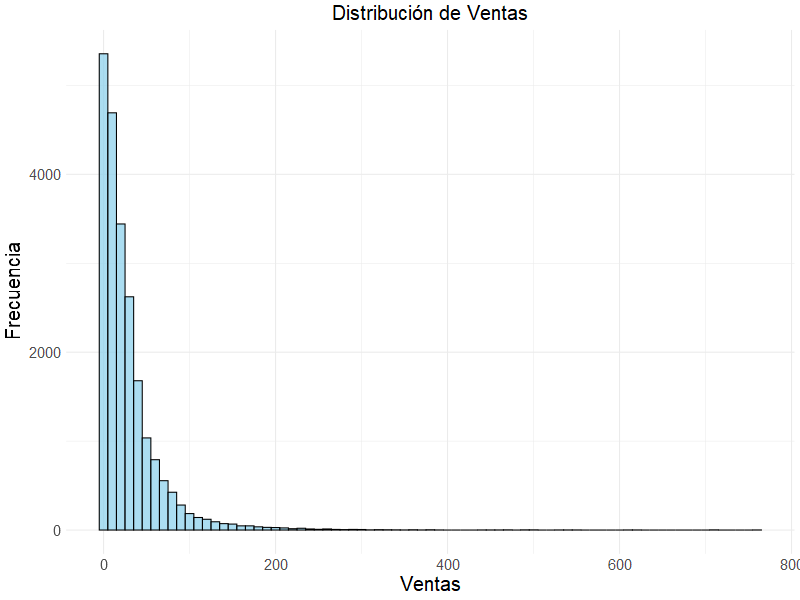

In [37]:
options(repr.plot.width=20, repr.plot.height=10)

ggplot(num, aes(x = ventas)) +
  geom_histogram(binwidth = 10, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de Ventas", x = "Ventas", y = "Frecuencia") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 20),
    axis.text.x = element_text(size = 15), 
    axis.text.y = element_text(size = 15),  
    axis.title.x = element_text(size = 20),
    axis.title.y = element_text(size = 20)
  )

Se puede ver que la tendencia de las compras se acumula en la parte izquierda desde 0 a 200 compras y después se atenua, disminuyendo la frecuencia en valores más elevados. En escenarios de retail puede deberse a ventas a mayoristas, siendo estos menores que los usuarios individuales que concentran la mayor parte de las compras.

Guardamos las variables tras el procesado.

In [38]:
saveRDS(num, file = "../02_Variables/num.rds")
saveRDS(cat, file = "../02_Variables/cat.rds")